In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib inline
# TODO
# One hot encoding
# hash encoding
# preprocessing

In [53]:
df = pd.DataFrame.from_csv('data_for_student_case.csv')
df.bookingdate = pd.to_datetime(df.bookingdate)
df.creationdate = pd.to_datetime(df.creationdate)
df.info()

C:\Users\mbezema\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 290382 entries, 1 to 482734
Data columns (total 16 columns):
bookingdate                     290382 non-null datetime64[ns]
issuercountrycode               289889 non-null object
txvariantcode                   290382 non-null object
bin                             290242 non-null float64
amount                          290382 non-null float64
currencycode                    290382 non-null object
shoppercountrycode              289900 non-null object
shopperinteraction              290382 non-null object
simple_journal                  290382 non-null object
cardverificationcodesupplied    275665 non-null object
cvcresponsecode                 290382 non-null int64
creationdate                    290382 non-null datetime64[ns]
accountcode                     290382 non-null object
mail_id                         290382 non-null object
ip_id                           290382 non-null object
card_id                         290382 non-null

In [56]:
df.bookingdate.unique()

array(['2015-11-09T14:26:51.000000000', '2015-11-09T14:27:38.000000000',
       '2015-11-23T16:34:16.000000000', ...,
       '2015-10-31T22:03:39.000000000', '2015-11-02T20:16:57.000000000',
       '2015-11-03T18:57:01.000000000'], dtype='datetime64[ns]')

In [71]:
for col in df.columns:
    print(f'Column: {col}')
    print(df[col].unique())
    print(f'length: {len(df[col])}')

Column: bookingdate
['2015-11-09T14:26:51.000000000' '2015-11-09T14:27:38.000000000'
 '2015-11-23T16:34:16.000000000' ... '2015-10-31T22:03:39.000000000'
 '2015-11-02T20:16:57.000000000' '2015-11-03T18:57:01.000000000']
length: 290382
Column: issuercountrycode
['MX' 'US' nan 'BR' 'CA' 'ES' 'CH' 'SA' 'TH' 'SG' 'NL' 'GB' 'IN' 'TW' 'MY'
 'DO' 'CO' 'CL' 'UA' 'AU' 'BE' 'TZ' 'PH' 'IT' 'DE' 'HU' 'KZ' 'GR' 'KE'
 'IL' 'VN' 'NO' 'AR' 'CN' 'HN' 'EG' 'AE' 'BB' 'FR' 'ID' 'BA' 'FI' 'PE'
 'RU' 'HK' 'KR' 'NZ' 'TR' 'IE' 'PK' 'SE' 'RO' 'EC' 'UY' 'BS' 'BH' 'PA'
 'BO' 'DK' 'AZ' 'QA' 'BZ' 'MT' 'LB' 'VE' 'JP' 'SV' 'LK' 'ZA' 'CK' 'LA'
 'KH' 'AT' 'MO' 'FJ' 'RS' 'LU' 'SB' 'JO' 'ZM' 'AO' 'PL' 'NG' 'LT' 'IQ'
 'BG' 'PT' 'GE' 'GI' 'LV' 'KW' 'BM' 'OM' 'CY' 'SK' 'ZZ' 'AL' 'GH' 'MU'
 'MD' 'SL' 'CR' 'BN' 'LY' 'ZW' 'SI' 'IS' 'BY' 'TJ' 'BW' 'MK' 'HR' 'VG'
 'BD' 'EE' 'CW' 'AM' 'AI' 'MN' 'PY' 'TM' 'ME' 'AD' 'GT' 'PR' 'DZ' 'TT'
 'CZ' 'KY' 'CG' 'CM' 'BJ' 'BF' 'CD' 'MV' 'CV' 'JM']
length: 290382
Column: txvariantcode
['mccre

In [65]:
print(df.simple_journal.value_counts())
print(df.cvcresponsecode.value_counts())
print(df.accountcode.value_counts())
print(df.txvariantcode.value_counts())

Settled       236691
Refused        53346
Chargeback       345
Name: simple_journal, dtype: int64
1    207568
0     76231
2      4072
3      2481
5        30
Name: cvcresponsecode, dtype: int64
UKAccount        207413
APACAccount       30733
MexicoAccount     27904
SwedenAccount     24332
Name: accountcode, dtype: int64
visadebit         172592
mccredit           63717
mcdebit            16679
visaclassic        16306
visaplatinum       10125
visagold            6545
visa                2019
visabusiness        1030
visasignature        619
visacorporate        421
mc                   167
visapurchasing       122
electron              27
vpay                   7
cirrus                 6
Name: txvariantcode, dtype: int64


In [44]:
txgroup = df.groupby(by=['txvariantcode'])
tx_avg = txgroup.mean()
tx_count = txgroup.count()
tx_count

,bookingdate,issuercountrycode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
txvariantcode,,,,,,,,,,,,,,,
cirrus,6,6,6,6,6,6,6,6,4,6,6,6,6,6,6
electron,27,25,27,27,27,27,27,27,27,27,27,27,27,27,27
mc,167,0,167,167,167,167,167,167,165,167,167,167,167,167,167
mccredit,63717,63717,63678,63717,63717,63585,63717,63717,60261,63717,63717,63717,63717,63717,63717
mcdebit,16679,16679,16671,16679,16679,16663,16679,16679,16235,16679,16679,16679,16679,16679,16679
visa,2019,1696,2018,2019,2019,2015,2019,2019,1891,2019,2019,2019,2019,2019,2019
visabusiness,1030,1030,1030,1030,1030,1009,1030,1030,1022,1030,1030,1030,1030,1030,1030
visaclassic,16306,16306,16303,16306,16306,16282,16306,16306,15984,16306,16306,16306,16306,16306,16306
visacorporate,421,421,421,421,421,421,421,421,409,421,421,421,421,421,421


In [70]:
txgroup.simple_journal

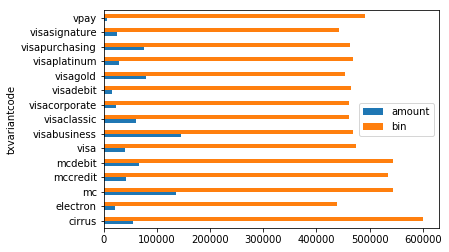

In [49]:
tx_series = tx_count.iloc[:,0]

features_of_interest = pd.DataFrame({'amount': tx_avg['amount'], 'bin': tx_avg['bin']})

features_of_interest.plot(kind='barh')

In [50]:
import seaborn as sns